<a href="https://colab.research.google.com/github/koud-dany/Exploring-the-paygap-/blob/main/pygap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#About Dataset
##Context
Want to know the base pay for different job roles, then this data set will be useful.

**About the data set:** <br>
The data set has been taken from glassdoor and focuses on income for various job titles based on gender. As there have been many studies showcasing that women are paid less than men for the same job titles, this data set will be helpful in identifying the depth of the gender-based pay gap. The features of the data set are: <br>
Job Title
Gender|
Age|
PerfEval|
Education|
Dept|
Seniority|
Base Pay, and
Bonus <br>

**Acknowledgements** <br>
The data set has been taken from the website of Glassdoor. The license was not mentioned on the source.

**Inspiration** <br>
To find out the pay gap between the gender for the same job title.

In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.offline import  iplot 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/Pay_Gap.csv")

df.head()

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319


In [ ]:
df['TotalPay'] = df['BasePay'] + df['Bonus']
df['Gender_dum']= df['Gender'].apply(lambda x : 0 if x=='Male' else 1)


In [ ]:
def gappay():

        pay_age= df.groupby(['Gender', 'JobTitle']).agg({"BasePay":'mean', "Bonus":'mean',"TotalPay":"mean","PerfEval":'mean'})
        male_info= pay_age.filter(like= 'Male', axis=0)
        index=[index[1] for index in male_info.index]
        female_info= pay_age.filter(like= 'Female', axis=0)

        perf_gender= pay_age.groupby(['Gender']).agg({"PerfEval":'sum'})
        perf_gender_job= pay_age["PerfEval"]
        return male_info, female_info, index, perf_gender,perf_gender_job



In [ ]:
def basepay():
        male= gappay()[0]["BasePay"]
        female= gappay()[1]["BasePay"]
        job_title= gappay()[2]

            # barchart
        fig = go.Figure(data=[
        go.Bar(name='Female', x=job_title, y=female, marker_color = 'rgb(204,255,219)', marker_line_color='rgb(8,48,107)'),
        go.Bar(name='Male', x=job_title, y=male, marker_color = 'rgb(204,255,255)', marker_line_color='rgb(8,48,107)')
            ])
            # Change the bar mode
        fig.update_layout(barmode='group', title='BasePay Gap by JobTitle')
        return fig
        
def bonus():
        male= gappay()[0]["Bonus"]
        female= gappay()[1]["Bonus"]
        job_title= gappay()[2]

            # barchart
        fig = go.Figure(data=[
        go.Bar(name='Female', x=job_title, y=female, marker_color = 'rgb(204,255,219)', marker_line_color='rgb(8,48,107)'),
        go.Bar(name='Male', x=job_title, y=male, marker_color = 'rgb(204,255,255)', marker_line_color='rgb(8,48,107)')
            ])
            # Change the bar mode
        fig.update_layout(barmode='group', title='Bonus Pay Gap by JobTitle')
        return fig
def totalpay():

        male= gappay()[0]["TotalPay"]
        female= gappay()[1]["TotalPay"]
        job_title= gappay()[2]

            # barchart
        fig = go.Figure(data=[
        go.Bar(name='Female', x=job_title, y=female, marker_color = 'rgb(204,255,229)',marker_line_color='rgb(8,48,107)'),
        go.Bar(name='Male', x=job_title, y=male,marker_color = 'rgb(204,255,255)',marker_line_color='rgb(8,48,107)')
            ])
            # Change the bar mode
        fig.update_layout(barmode='group', title='Total Pay Gap by JobTitle')
        fig.update_traces( marker_line_width=1.5, opacity=0.1)
        return fig 

def genderperf():
        perf_gender= gappay()[3]
        perf_gender_job= gappay()[4]
        female_perf= perf_gender.filter(like="Female", axis= 0)
        male_perf= perf_gender.filter(like="Male", axis= 0)
       
        female_perf_job= perf_gender_job.filter(like="Female", axis= 0)
        male_perf_job= perf_gender_job.filter(like="Male", axis= 0)
        
        return female_perf,male_perf, female_perf_job, male_perf_job
def genderperf_plot():
        
        female_perf = genderperf()[0]
        male_perf = genderperf()[1]
    
        fig = go.Figure(data=[
        go.Bar(name='Female', x=female_perf.index, y=female_perf["PerfEval"], marker_color = 'rgb(204,255,229)',marker_line_color='rgb(8,48,107)'),
        go.Bar(name='Male', x= male_perf.index, y=male_perf["PerfEval"], marker_color = 'rgb(204,255,255)',marker_line_color='rgb(8,48,107)' )
        ])
        # Change the bar mode
        fig.update_layout(barmode='group', title='Performance by Gender')
      
        return fig
  

def perf_job_plot():
        female_perf_job = genderperf()[2]
        male_perf_job = genderperf()[3]

        job_title= [job[1] for job in male_perf_job.index]
        fig = go.Figure(data=[
        go.Bar(name='Female', x=job_title, y=female_perf_job),
        go.Bar(name='Male', x= job_title, y=male_perf_job)
        ])
        # Change the bar mode
        fig.update_layout(barmode='group', title='Performance per Jobtitle by Gender')
        fig.show()
    
def gendersplit():
        male_df= df[df["Gender"]== "Male"].reset_index(drop=True)
        feMale_df= df[df["Gender"]== "Female"].reset_index(drop=True)
        return male_df, feMale_df

def jobtitle():
        male_df= gendersplit()[0]
        feMale_df= gendersplit()[1]
        title_woman= feMale_df.groupby(["Gender","JobTitle"]).count().sort_values("Age", ascending = False)
        labels= [job[1] for job in title_woman.index]
        title_woman["values"]= title_woman["TotalPay"]
        woman_values= title_woman["values"]
        title_man= male_df.groupby(["Gender","JobTitle"]).count().sort_values("Age", ascending = False)
        title_man["values"]= title_man["TotalPay"]
        man_values= title_man["values"]
        # Graph / pie-chart
        female = go.Pie(labels=labels,values=woman_values,name="Female",hole=0.5,domain={'x': [0,0.46]})
        male = go.Pie(labels=labels,values=man_values,name="Male",hole=0.5,domain={'x': [0.52,1]})

        layout = dict(title = 'Job Title Distribution', font=dict(size=14), legend=dict(orientation="h"),
        annotations = [dict(x=0.2, y=0.5, text='Female', showarrow=False, font=dict(size=20)),
        dict(x=0.8, y=0.5, text='Male', showarrow=False, font=dict(size=20)) ])

        fig = dict(data=[female, male], layout=layout)
        iplot(fig)

def educationlevel():
        male_df= gendersplit()[0]
        feMale_df= gendersplit()[1]
        level_woman= feMale_df.groupby(["Gender","Education"]).count().sort_values("Age", ascending = False)
        level_woman["values"]= level_woman["TotalPay"]
        woman_value= level_woman["values"]
        level_man= male_df.groupby(["Gender","Education"]).count().sort_values("Age", ascending = False)
        labels= [edu[1] for edu in level_man.index]
        level_man["values"]= level_man["TotalPay"]
        man_value= level_man["values"]

        female = go.Pie(labels=labels,values=woman_value,name="Female",hole=0.5,domain={'x': [0,0.46]},  pull=[0.1, 0.1, 0.1,0.1])
        male = go.Pie(labels=labels,values=man_value,name="Male",hole=0.5,domain={'x': [0.52,1]},pull=[0.1, 0.1, 0.1,0.1])

        layout = dict(title = 'Education Level Distribution', font=dict(size=14), legend=dict(orientation="h"),
                    annotations = [dict(x=0.2, y=0.5, text='Female', showarrow=False, font=dict(size=20)),
                                    dict(x=0.8, y=0.5, text='Male', showarrow=False, font=dict(size=20)) ])

        fig = dict(data=[female, male], layout=layout)
        iplot(fig)

def scattereduc():
  gender= ['men', 'women']
  male= gappay()[0]["TotalPay"]
  female= gappay()[1]["TotalPay"]
  job_title= gappay()[2]


        # barchart
  fig = go.Figure(data=[
  go.Bar(name='Female', x=job_title, y=female,marker_line_color='rgb(8,48,107)',marker_color='rgb(204,255,229)' ),
  go.Bar(name='Male', x=job_title, y=male,marker_line_color='rgb(8,48,107)',marker_color='rgb(204,255,255)')
  
              ])
    
    #  scatter plot
  fig.add_trace(
  go.Scatter(x=df[df['Gender']=="Male"]['JobTitle'],
  y=df[df['Gender']=="Male"]['TotalPay'],
  name='Men',
  mode='markers',  
  marker_color='red',
  text=df[df['Gender']=="Male"]['Education']))

  fig.add_trace(
  go.Scatter(x=df[df['Gender']=="Female"]['JobTitle'],
  y=df[df['Gender']=="Female"]['TotalPay'],
  name='Women',
  mode='markers',  
  marker_color='blue',


  text=df[df['Gender']=="Female"]['Education']))
  fig.update_layout(title='Education distribution with pay', xaxis=dict(title='Job Title'), yaxis=dict(title='AvG Total pay'))
 
  fig.show()

In [ ]:
basepay()


In [ ]:
bonus()

In [ ]:
scattereduc()

educationlevel()

In [ ]:
genderperf_plot()


In [ ]:
perf_job_plot()

In [ ]:
best_payjob= df.groupby('JobTitle').agg({'TotalPay': 'median'}).sort_values('TotalPay', ascending= False).reset_index().head(5)
low_payjob= df.groupby('JobTitle').agg({'TotalPay': 'median'}).sort_values('TotalPay', ascending= False).reset_index().tail(5)

fig1= go.Figure(go.Bar(
            x=best_payjob['TotalPay'],
            y=best_payjob['JobTitle'],
            orientation='h',
           
            
            ))
# The average median household income in the United States
fig1.add_vline(
        x=67521, line_width=3, line_dash="dash", 
        line_color="red")
fig1.update_layout(title_text='Highest paid Jobs' , yaxis=dict(title='Job Title'), xaxis=dict(title='Wage'))
fig1.update_traces(marker_color='rgb(122,322,155)',marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)
fig2=go.Figure(go.Bar(
            x=low_payjob['TotalPay'],
            y=low_payjob['JobTitle'],
            orientation='h',
            
            ))
fig2.add_vline(
        x=67521, line_width=3, line_dash="dash", 
        line_color="red")
fig2.update_traces(marker_color='yellow',marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.2)
fig2.update_layout(title_text='Lowest paid Jobs', yaxis=dict(title='Job Title'), xaxis=dict(title='Wage'))

fig1.show()
fig2.show()
jobtitle()


* All median Job  wages in the dataset are above The average median household income in the United States  ~$67,521. Therefore, all Jobs in the dataset are good-paying Jobs. <br> 
* Not only do the females make almost equal amounts to men they even exceed their pay in certain fields such as data science, Manager, Graphic Designer, Warehouse associate, and financial analyst. <br>
* Men still dominate in high paying Jobs even though the gap in number is not significant

<hr>

**Let see if the the dataset can help understand the wage gab better by exploring the importance of the different features**

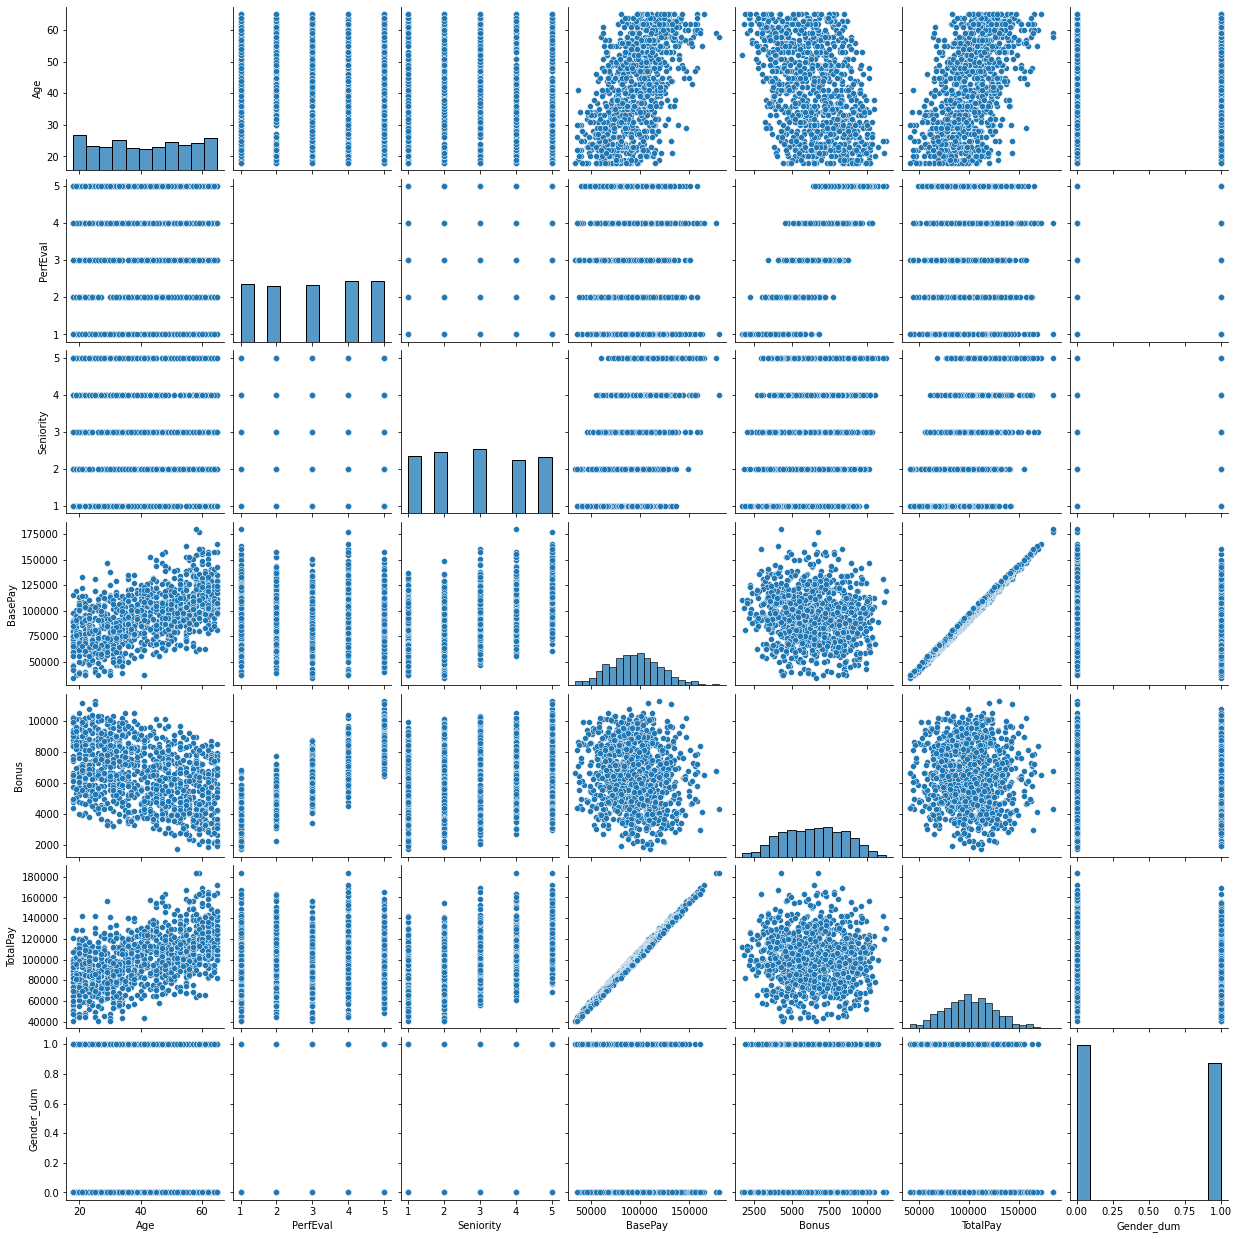

In [ ]:
sns.pairplot(df)

<AxesSubplot:>

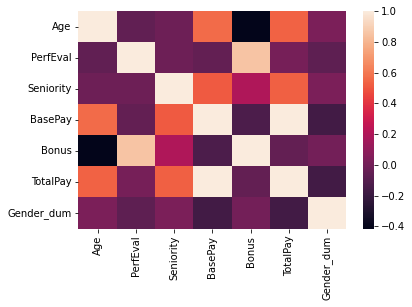

In [ ]:
sns.heatmap(df.corr()) 

# **linear Regression** 

Let's build a very simple regression model in order to understand the importance of the different features.


In [ ]:
col= ['Gender_dum','PerfEval','Dept', 'Age','Seniority']
X= df[col]
y= df['TotalPay'].values.reshape(-1,1)


In [ ]:
X= pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

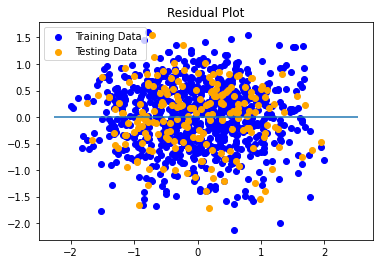

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()


In [ ]:
model.coef_

array([[-2.09029751e-01,  1.20904960e-03,  5.22636649e-01,
         5.49843581e-01, -3.19205978e+13, -3.11743318e+13,
        -3.14033404e+13, -3.16279113e+13, -3.19925877e+13]])

In [ ]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.35942462334351233, R2: 0.6371487808061321


In [ ]:
l=[]
for i in model.coef_[0]:
    l.append(i)

Regression Coefficients
MSE: 0.35942462334351233, R2: 0.6371487808061321


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



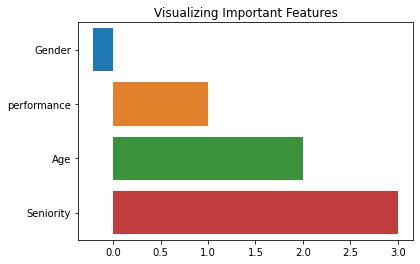

In [ ]:
plt.barh([0,1,2,3],l[:4])
sns.barplot([0,1,2,3], l[:4],orient = 'h')
plt.yticks(range(4),['Gender','performance','Age','Seniority'], fontsize =10 )
plt.title("Visualizing Important Features")
print('Regression Coefficients')
print(f"MSE: {MSE}, R2: {r2}")



* Performance evaluation has a very small but positive effect on the wage as well as age and seniority.


In [ ]:
regression_df= pd.get_dummies(df[['JobTitle','Gender','Age','PerfEval','Education','Dept','Seniority']])
X= regression_df
y= df['TotalPay'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

In [ ]:

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.13807474617204835, R2: 0.8606089100898103


In [ ]:
model = LinearRegression()
columns = ['Gender_dum']
X = df[columns]

X_std = StandardScaler().fit_transform(X)
y = df['TotalPay'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=42)

model.fit(X_train,y_train)

print('R^2 on training...',model.score(X_train,y_train))
print('R^2 on test...',model.score(X_test,y_test))

R^2 on training... 0.02899716997280266
R^2 on test... 0.025491377732578147


The gender explains about 2% of the variance in the results


* A larger dataset (including low paying jobs)  and more features such as working hours will be helpful to  better understand the wage gab.
